In [1]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
docs = ['먹고 싶은 사과',
        '먹고 싶은 바나나',
        '길고 노란 바나나 바나나',
        '저는 과일이 좋아요']

tfidf = TfidfVectorizer()
tfidf.fit(docs)

TfidfVectorizer()

In [3]:
tfidf.vocabulary_

{'먹고': 3,
 '싶은': 6,
 '사과': 5,
 '바나나': 4,
 '길고': 1,
 '노란': 2,
 '저는': 7,
 '과일이': 0,
 '좋아요': 8}

In [4]:
tfidf.transform([docs[0]]).toarray()

array([[0.        , 0.        , 0.        , 0.52640543, 0.        ,
        0.66767854, 0.52640543, 0.        , 0.        ]])

In [6]:
from gensim.models import Word2Vec

In [7]:
sentences = [['this','is','a','good','product'],
             ['this','is','a','excellent','product'],
             ['it','is','a','bad','product'],
             ['it','is','the','worst','product']]

In [8]:
model = Word2Vec(sentences, window=3, min_count=1, workers=1)

In [9]:
word_vectors = model.wv


In [ ]:
word_vector_list = word_vectors.vectors
word_vector_list

In [19]:
word_vectors.similarity(w1='bad', w2='good')

-0.09326909

In [24]:
model_result = word_vectors.most_similar('product')
print(model_result)

[('good', 0.21615536510944366), ('bad', 0.09291587769985199), ('excellent', 0.027067923918366432), ('the', 0.016163580119609833), ('is', -0.0109050702303648), ('this', -0.02774116024374962), ('a', -0.052335452288389206), ('worst', -0.05971088632941246), ('it', -0.11159904301166534)]


In [20]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
tdata = pca.fit_transform(word_vector_list)

In [28]:
vocabs = word_vectors.index_to_key
vocabs

['product',
 'is',
 'a',
 'it',
 'this',
 'worst',
 'the',
 'bad',
 'excellent',
 'good']

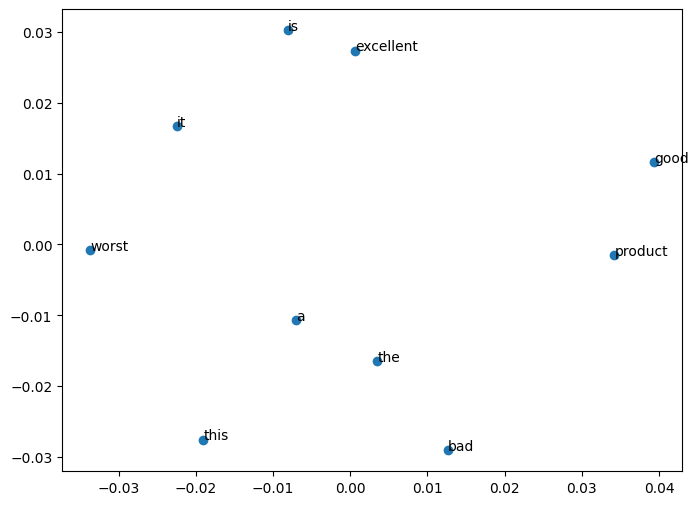

In [29]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(tdata[:, 0], tdata[:,1], marker='o')
for i, v in enumerate(vocabs):
    plt.annotate(v, xy=(tdata[:, 0][i], tdata[: ,1][i]))
plt.show()